# Python Session 

## Python & SQL


In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

from sqlalchemy import create_engine

Getting a connection to the database through `SQLAlchemy`. 

As you can see we haven't reveal your credentials, we are sending them as envrionment variables to protect their values. 

In [56]:
def get_db_conn():
    """ Get an authenticated psycopg db connection"""
    
    user=os.getenv('PGUSER'),  # returns tuple
    password=os.getenv('PGPASSWORD'), #returns tuple
    host=os.getenv('PGHOST'), #returns tuple
    port=int(os.getenv('PGPORT')), #returns tuple
    database=os.getenv('PGDATABASE')
    
    engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(user[0], 
                                                                password[0], 
                                                                host[0], 
                                                                port[0], 
                                                                database))
    connection = engine.connect()
    
    return connection

Getting a connection to the database

In [57]:
db_conn = get_db_conn()

Just looking what's in the table of `food_facilities`

In [58]:
q = """
    select 
        * 
    from 
       clean.food_facilities 
    limit 10
"""

In [59]:
food_facilities_glimpse = pd.read_sql(q, db_conn)

In [60]:
food_facilities_glimpse

,id,facility_name,num,street,city,state,zip,municipal,category_cd,description,...,fdo,bus_st_date,bus_cl_date,seat_count,noroom,sq_feet,status,placard_st,location,address
0,10762,North Versailles VFD / South Wilmerding Social...,830,Sylvan Ave,North Versailles,PA,15137,North Versailles,250,Social Club-Bar Only,...,1969-01-01,1969-01-01,None,60,None,None,1,1.0,"(40.3893522876375,-79.7954084350569)",830 Sylvan Ave PA 15137
1,10781,Hill Top Lodge #151,128-30,Ormsby Ave,Pittsburgh,PA,15210,Mt Oliver,250,Social Club-Bar Only,...,1984-06-17,1984-06-17,None,35,None,None,7,NaN,"(40.4281106915889,-79.8638282475193)",128-30 Ormsby Ave PA 15210
2,10693,The Suburban Room,3113,W Liberty Ave,Pittsburgh,PA,15216,Dormont,201,Restaurant with Liquor,...,1984-06-17,1984-06-17,None,41,None,None,7,1.0,"(40.3909702749449,-80.0393476003993)",3113 W Liberty Ave PA 15216
3,10707,Hyd A Way Bar,None,Box 39,Morgan,PA,15064,South Fayette,201,Restaurant with Liquor,...,1987-03-01,1987-03-01,None,30,None,None,7,NaN,None,Box 39 PA 15064
4,10711,Bratstvo Lodge #6 SNPJ,540,3rd Avenue,Bridgeville,PA,15017,Bridgeville,201,Restaurant with Liquor,...,1984-06-17,1984-06-17,None,75,None,None,1,1.0,"(40.3559346009913,-80.1351853772867)",540 3rd Avenue PA 15017
5,10730,Aleppo Firemens Club,None,Weber Rd,Sewickley,PA,15143,Aleppo,250,Social Club-Bar Only,...,1984-06-17,1984-06-17,None,75,None,None,7,NaN,None,Weber Rd PA 15143
6,10734,Holiday Park Volunteer Fire Dept,415,Abers Creek Road,Pittsburgh,PA,15239,Plum,408,Firehall with Liquor,...,1957-01-01,1957-01-01,None,125,None,None,1,1.0,"(40.4673015831831,-79.7058879594831)",415 Abers Creek Road PA 15239
7,10655,Ames,5775,Baptist Rd,Bethel Park,PA,15102,Bethel Park,212,Chain Restaurant without Liquor,...,1999-04-15,1999-04-15,None,13,None,None,7,NaN,"(40.3488894875768,-80.0147316818965)",5775 Baptist Rd PA 15102
8,10664,B P O E / Elks Club #2213,2425,South Park Road,Bethel Park,PA,15102,Bethel Park,201,Restaurant with Liquor,...,1989-01-01,1989-01-01,2017-09-28,70,None,None,7,1.0,"(40.3296547019916,-80.0234242292086)",2425 South Park Road PA 15102
9,10668,Bridgeville Dari Delite,413,Bower Hill Rd,Bridgeville,PA,15017,Bridgeville,211,Restaurant without Liquor,...,1984-06-17,1984-06-17,None,0,None,None,7,NaN,"(40.3594389487414,-80.109897092669)",413 Bower Hill Rd PA 15017


Which are the 10 food facilities with most violations in 2021? 

In [61]:
q = """
  select 
    facility_name, 
    count(*) as num_violations
  from 
    clean.violations
  where 
    date_part('year', inspect_dt) = 2020
  group by facility_name 
  order by count(*) desc
"""

In [62]:
violations = pd.read_sql(q, db_conn)

In [63]:
violations.shape

(3560, 2)

In [64]:
violations.head(10)

,facility_name,num_violations
0,Subway Sandwiches & Salads,86
1,McDonald's,72
2,All India,62
3,Caliente Pizza & Draft House,58
4,Al's Fish & Chicken,55
5,Italian Village Pizza,53
6,El Campesino Restaurante Mexicano,51
7,Dive Bar & Grille,50
8,"Hook, Fish & Chicken",48
9,Fellini's Pizzeria,46


In [68]:
violations_top_10 = violations.head(10)

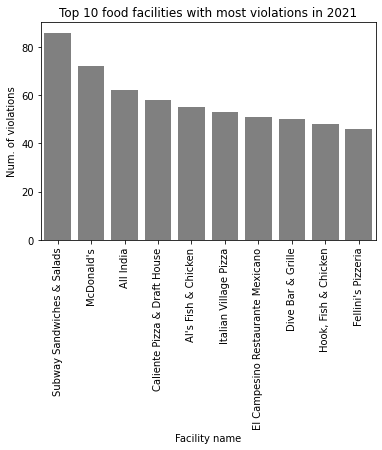

In [69]:
g = sns.barplot(data=violations_top_10, x='facility_name', y='num_violations', color="grey")
g.set_title("Top 10 food facilities with most violations in 2021")
g.set_ylabel("Num. of violations")
g.set_xlabel("Facility name")
# rotating labels on x axis
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()

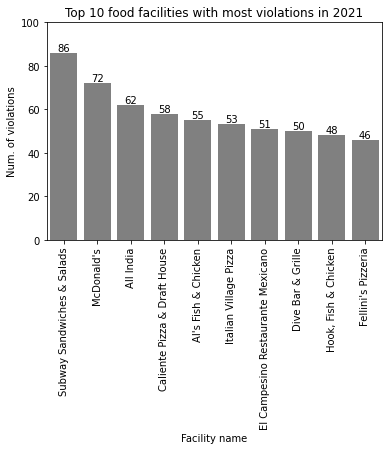

In [70]:
g = sns.barplot(data=violations_top_10, x='facility_name', y='num_violations', color="grey")
g.set_title("Top 10 food facilities with most violations in 2021")
g.set_ylabel("Num. of violations")
g.set_xlabel("Facility name")
# rotating labels on x axis
g.set_xticklabels(g.get_xticklabels(), rotation=90)
# adding labels to each bar
g.bar_label(g.containers[0])
# changing the limit of y axis 
g.set_ylim(0, 100)

plt.show()

Let's analyze the number of violations on 2021 

In [72]:
violations.describe()

,num_violations
count,3560.000000
mean,6.037640
std,6.267229
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,86.000000


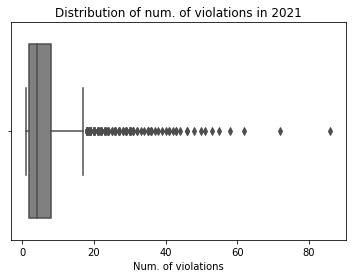

In [79]:
g = sns.boxplot(data=violations, x="num_violations", color="grey")
g.set_title("Distribution of num. of violations in 2021")
g.set_xlabel("Num. of violations")

plt.show()

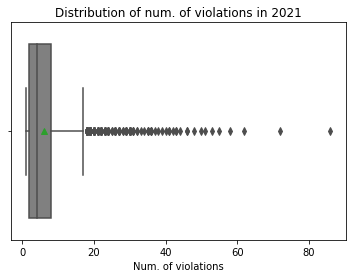

In [80]:
# show mean
g = sns.boxplot(data=violations, x="num_violations", color="grey", showmeans=True)
g.set_title("Distribution of num. of violations in 2021")
g.set_xlabel("Num. of violations")

plt.show()

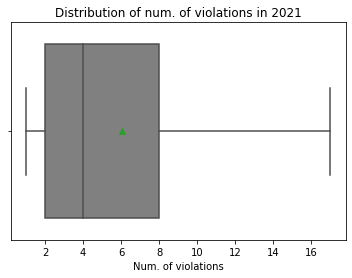

In [83]:
# without outliers
g = sns.boxplot(data=violations, x="num_violations", color="grey", showmeans=True, showfliers=False)
g.set_title("Distribution of num. of violations in 2021")
g.set_xlabel("Num. of violations")

plt.show()